In [1]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_2758/1319117283.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# An aside on Linear vs. Parameter classes

- **Initialization of Input and Weights**: The code snippet starts by creating a matrix `x` representing inputs, with dimensions 10 (number of samples) by 50 (features per sample), and a weight matrix `W1` using PyTorch's `nn.Parameter`, with dimensions 128 by 50. This setup is typical in neural network layers where each input feature is connected to every neuron in the next layer, and `W1` represents the weights of these connections.

- **Examination of Weights Matrix**: The weight matrix `W1` is printed to the console to examine its initial random values. This step is crucial for debugging and understanding the initial state of the model's parameters before training begins.

- **Dimensionality Insights**: The commented-out sections (when uncommented) are designed to provide insights into the dimensionality of the weights matrix and its transpose. Understanding the shape of `W1` and `W1.t()` (its transpose) is essential for grasping how matrix operations are performed in neural networks, particularly in how inputs are transformed through layers.

- **Output Computation**: The final commented-out section demonstrates how to compute the output `y` of applying the input matrix `x` to the weight matrix `W1`. The matrix multiplication `x@W1` is a fundamental operation in neural networks, transforming the input data through the layer's weights. The shape of `y` is printed to confirm the output dimensions, which results from the matrix multiplication conforming to the rules of linear algebra.



In [2]:
# create an input and weights matrix
x  = torch.rand(10,50)
W1 = nn.Parameter(torch.randn(128,50))

# Let's see what W1 is
print(W1)
print('\n\n')

# # # Its size and the size of its transpose
print(W1.shape)
print(W1.t().shape)
print('\n\n')

# # compute an output
y = x@W1.t()
print(y.shape)

Parameter containing:
tensor([[-0.6496,  1.3759, -1.2604,  ...,  0.0368, -0.4694, -0.7525],
        [ 0.4789,  0.4036, -0.0886,  ..., -2.3484, -0.0525, -0.4058],
        [ 0.6304, -0.1598,  1.0237,  ..., -1.9904, -1.3008, -1.4927],
        ...,
        [-0.6351, -0.4701,  0.1447,  ..., -0.2066, -0.5548, -0.0426],
        [-0.3032, -0.2060,  0.6669,  ..., -0.5013,  0.3578,  1.2178],
        [-0.4923, -0.3849, -1.7634,  ...,  1.8217,  0.3138, -0.6439]],
       requires_grad=True)



torch.Size([128, 50])
torch.Size([50, 128])



torch.Size([10, 128])


In [3]:
# Now try again with the Linear method
W2 = nn.Linear(128,50)

# Let's see what W2 is
print(W2)
print('\n\n')

# # Its size and the size of its transpose
print(W2.weight.shape)
print(W2.weight.t().shape)
print('\n\n')

# # compute an output
y = x @ (W2.weight)
print(y.shape)

Linear(in_features=128, out_features=50, bias=True)



torch.Size([50, 128])
torch.Size([128, 50])



torch.Size([10, 128])


In [4]:
# confusion from the previous cells
print(W1.shape)
print(W2.weight.shape)

# confusion solved ;)
# (size of W -> [outputs,inputs], but nn.Linear expects [inputs,outputs])

torch.Size([128, 50])
torch.Size([50, 128])


In [5]:
# see all attributes of the class Linear
dir(nn.Linear)

# and the docstring for Linear.forward
# ??nn.Linear.forward()
# ??nn.Linear.__init__() # note the inputs vs. how weight is created

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__constants__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_call_impl',
 '_compiled_call_impl',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_maybe_warn_non_full_backward_hook',
 '_named_members',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_version',
 '_wrapped_call_impl',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'call_super_init',
 'children',
 'compile',
 'cpu',
 'cuda',
 'double',
 'dump_p

# Import and process the data

In [6]:
data = np.loadtxt(open('train_mnist.csv','rb'),delimiter=',',skiprows=1)


# don't need labels!
data = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor( dataNorm ).float()

# Create the DL model

- **Model Class Definition**: The provided code defines a function `createTheMNISTAE` to create an autoencoder model (`aenet`) specifically for processing MNIST images. This model is built using PyTorch's neural network module (`nn.Module`), illustrating a custom architecture for encoding and decoding image data.

- **Layer Configuration**: The autoencoder consists of an input layer that transforms the flattened MNIST images (784 pixels) to a 128-dimensional space. Unlike typical implementations, the encoder layer uses a `nn.Parameter` for direct weight definition, bypassing the `nn.Linear` module for experimental purposes. The decoder layer then projects back from the 128-dimensional encoded representation to the original image size (784 pixels).

- **Forward Pass Implementation**: The forward pass method demonstrates custom data flow through the model, accommodating the direct use of `nn.Parameter` for the encoder layer. It involves transposing input matrices, applying matrix multiplication for encoding and decoding, and manually transposing matrices to align dimensions, followed by activation functions (`ReLU` for intermediate layers and `Sigmoid` for the output layer).

- **Model, Loss Function, and Optimizer**: Upon defining the autoencoder class, the function initializes an instance of this model, specifies a mean squared error loss function (`nn.MSELoss`) for training, and selects the Adam optimizer with a learning rate of 0.001. This setup is prepared for training the model to reconstruct MNIST images by minimizing reconstruction error.

This markdown content explains the structure and functionality of a custom autoencoder model for MNIST image processing, highlighting its unique aspects, such as the use of `nn.Parameter` for defining weights and the manual implementation of forward propagation steps.


In [7]:
# create a class for the model
def createTheMNISTAE():

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,128)
      
      ### encoder layer
      self.enc = nn.Parameter(torch.randn(50,128))
      # self.enc = nn.Linear(128,50) # not used! left here for comparison

      ### latent layer (not used!)
      #self.lat = nn.Linear(50,128)

      ### decoder layer
      self.dec = nn.Linear(128,784)

    # forward pass
    def forward(self,x):
      # "normal" forward prop in first stage
      x = F.relu( self.input(x) )

      # a Parameter type is not a Linear type, so we implement the multiplication directly
      x = x.t() # need to transpose the input matrix due to multisample input matrices
      x = F.relu( self.enc@x )

      # same for the decoding layer but reversed
      x = F.relu( self.enc.t()@x )
      x = x.t() # and then transpose it back

      # "normal" final stage
      y = torch.sigmoid( self.dec(x) )
      return y
  
  # create the model instance
  net = aenet()
  
  # loss function
  lossfun = nn.MSELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [8]:
# test the model with a bit of data
net,lossfun,optimizer = createTheMNISTAE()

X = dataT[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


# Create a function that trains the model

In [9]:
def function2trainTheModel():

  # number of epochs
  numepochs = 10000
  
  # create a new model
  net,lossfun,optimizer = createTheMNISTAE()

  # initialize losses
  losses = torch.zeros(numepochs)


  # loop over epochs
  for epochi in range(numepochs):

    # select a random set of images
    randomidx = np.random.choice(dataT.shape[0],size=32)
    X = dataT[randomidx,:]

    # forward pass and loss
    yHat = net(X)
    loss = lossfun(yHat,X)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # losses in this epoch
    losses[epochi] = loss.item()
  # end epochs

  # function output
  return losses,net

# Run the model and show the results!

Final loss: 0.0164


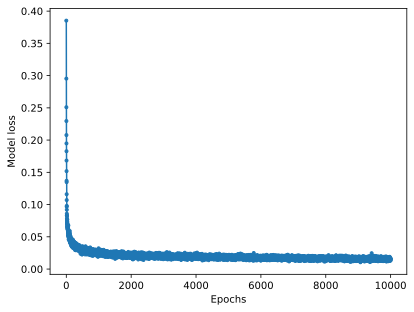

In [10]:
# train the model
losses,net = function2trainTheModel()
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

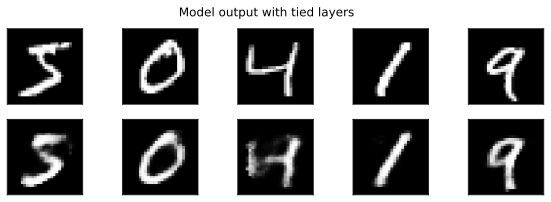

In [11]:
# Visualization of inputs and outputs
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.suptitle('Model output with tied layers')
plt.show()

# Add noise to see a use case of an autoencoder

- **Noise Addition to Image Data**: The code snippet begins by selecting a small subset of images (`X`) from a preprocessed dataset (`dataT`), consisting of the first 10 samples. It introduces artificial noise to these images by adding random values scaled by 1/4th to the original pixel values, simulating common real-world distortions that images might undergo.

- **Image Clipping for Realism**: After the noise is added, the pixel values of the noisy images (`Xnoise`) are clipped to ensure they remain within the valid range for image data (0 to 1). This step is crucial to maintain the realism of the images, as pixel values outside this range are not interpretable in the context of grayscale images.

- **Visual Comparison of Original and Noisy Images**: The code visualizes the effect of the added noise by displaying the original and noisy versions of the first 5 images in a figure with two rows of subplots. The top row showcases the original images, while the bottom row displays their noisy counterparts, allowing for a direct visual comparison.

- **Enhanced Data Representation for Robustness Testing**: This experiment not only illustrates the impact of noise on image quality but also sets the stage for testing the robustness of image processing models, such as autoencoders, in denoising or recognizing noisy images. By examining how models handle such artificially noised images, developers can gain insights into the models' capabilities and limitations in dealing with real-world data imperfections.

This markdown content details the process and purpose behind adding noise to a subset of images from a dataset, demonstrating the preparation of data for experiments in image denoising and model robustness evaluation.


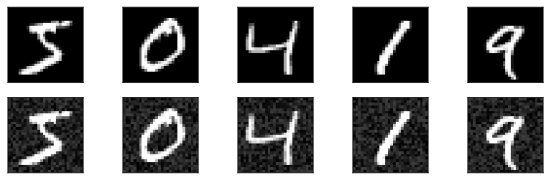

In [12]:
# grab a small set of images
X = dataT[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/4

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  
plt.show()

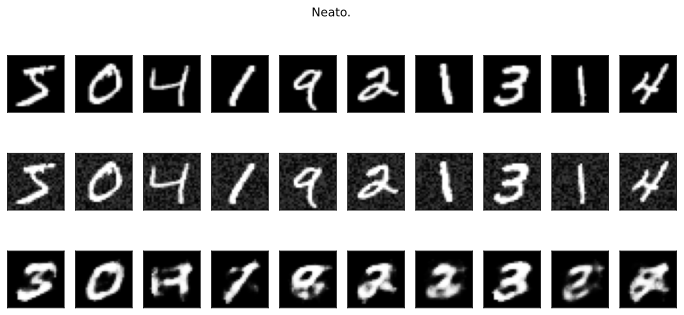

In [13]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])
  
plt.suptitle('Neato.')
plt.show()